In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Geodesics as gd
import Model as md

100%|██████████| 10000/10000 [01:23<00:00, 119.61it/s]


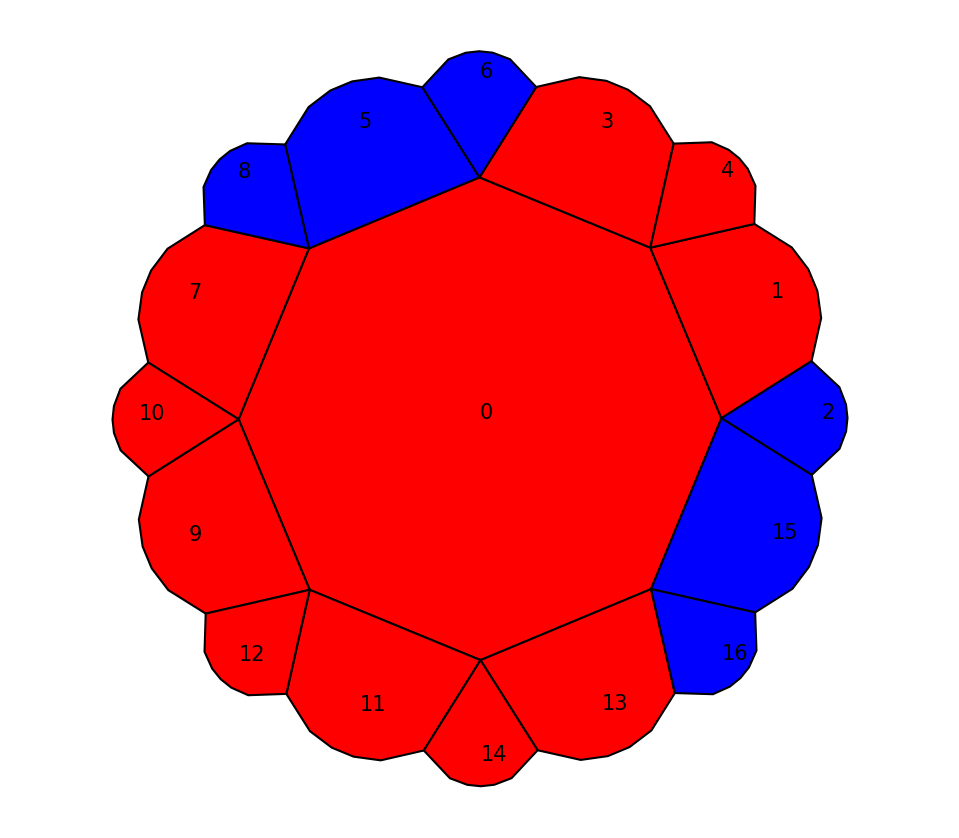

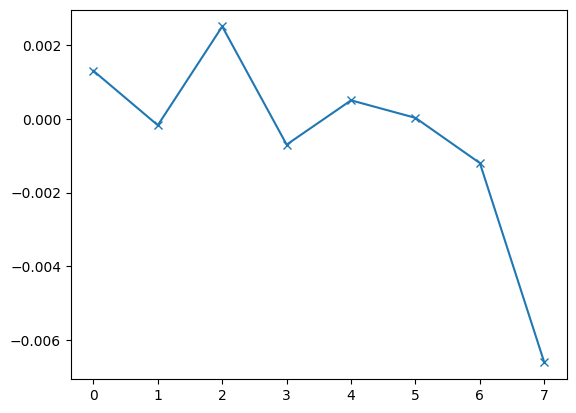

In [24]:

from tqdm import tqdm
p = 8; q = 4; nlayers = 2
nDecorr = 100
nMeasurements = 10000
model = md.FractonModel(p,q,nlayers)


corr = np.zeros(int(len(model.border)/2)+1)
corr[0] = nMeasurements*len(model.border)
tiling = model.lattice
spins = [1 for _ in range(len(tiling))]

for iteration in tqdm(range(nMeasurements)):
    for decorr in range(nDecorr):
        geod = np.random.choice(model.geodesicList)
        inner = np.random.randint(2)*2-1
        model.spins = model.spins*np.array([inner*geod.isInside(tiling.get_center(index)) for index in range(len(tiling))])
    corr[1:] += model.getBorderCorrelations()

fig, ax = model.quick_plot(colors = 'spins')
for index in range(len(model.lattice)):
    center = model.lattice.get_center(index)
    ax.text(center.real,center.imag, index)

fig2,ax2 = plt.subplots()

ax2.plot(corr[1:]/(nMeasurements*len(model.border)),'-x')
            
    
